In [1]:
import pandas as pd
try:
    import pickle5 as pickle
except ImportError:  
    import pickle
import networkx as nx
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import numpy as np
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def norm(v):
    maxx = max(v)
    minn = min(v)
    norm_v = []
    for val in v:
        norm_val=(val-minn)/(maxx-minn)
        norm_v.append(norm_val)
    return norm_v

In [ ]:
weighted_directed_hyplinks_graph = nx.read_gml("weighted_directed_hyplinks_graph")
weighted_directed_followers_graph = nx.read_gml("weighted_directed_followers_graph")


In [ ]:
#import positional dictionary which contains the geogrphic postions of the companies headquaters
try:
    import cPickle as pickle
except ImportError:  
    import pickle
with open('pos_dic2_hyp.p', 'rb') as fp: 
    pos_dic = pickle.load(fp)

In [3]:
#check whther both networks actually contain the same nodes
n1 = list(weighted_directed_followers_graph.nodes())
n2 = list(weighted_directed_hyplinks_graph.nodes())
n1 == n2
set(n1)==set(n2)

In [4]:
print(nx.info(weighted_directed_followers_graph))
print(nx.info(weighted_directed_hyplinks_graph))

Name: 
Type: DiGraph
Number of nodes: 11890
Number of edges: 117396
Average in degree:   9.8735
Average out degree:   9.8735
Name: 
Type: DiGraph
Number of nodes: 11890
Number of edges: 5670
Average in degree:   0.4769
Average out degree:   0.4769


# Degree



In [19]:
deg_hyp_in = weighted_directed_hyplinks_graph.in_degree()
deg_hyp_in = dict(deg_hyp_in) 
deg_hyp_out = weighted_directed_hyplinks_graph.out_degree()
deg_hyp_out = dict(deg_hyp_out)

deg_foll_in = weighted_directed_followers_graph.in_degree()
deg_foll_in = dict(deg_foll_in)   
deg_foll_out = weighted_directed_followers_graph.out_degree()
deg_foll_out = dict(deg_foll_out)  

In [25]:
deg_h = dict(nx.degree(weighted_directed_hyplinks_graph))
deg_f = dict(nx.degree(weighted_directed_followers_graph))

In [21]:
# sanity check
list(deg_hyp_in.keys())==list(deg_hyp_out.keys())

True

In [42]:
deg_h_l = []
deg_f_l = []
deg_hyp_in_values = []
deg_hyp_out_values = []
deg_foll_in_values = []
deg_foll_out_values = []

for key in weighted_directed_followers_graph.nodes():
    deg_h_l.append(deg_h[key])
    deg_f_l.append(deg_f[key])
    deg_hyp_in_values.append(deg_hyp_in[key])
    deg_hyp_out_values.append(deg_hyp_out[key])
    deg_foll_in_values.append(deg_foll_in[key])
    deg_foll_out_values.append(deg_foll_out[key])
    

In [45]:
# sanity check
list(weighted_directed_followers_graph.nodes()) == list(deg_foll_out.keys())

True

In [53]:
degree = pd.DataFrame(list(zip(list(weighted_directed_followers_graph.nodes()),
                                 (deg_h_l),
                                 (deg_f_l),
                                 (deg_hyp_in_values),
                                 (deg_hyp_out_values),
                                 deg_foll_in_values,
                                 deg_foll_out_values)),
                                 columns = ['nodes','degree_h','degree_f','deg_h_in','deg_h_out',
                                   'deg_f_in','deg_f_out'])

In [54]:
degree.to_csv('/Users/dorianbenutzer/Desktop/Masterthesis/Scripts/data/Q2/degree.csv')

In [67]:
sum(deg_hyp_in_dic.values())/11894

0.47671094669581304

In [68]:
sum(deg_hyp_out_dic.values())/11894

0.47671094669581304

In [69]:
# values per nertwork
print(sum(deg_foll_out_dic.values()))
print(sum(deg_foll_in_dic.values()))
print(sum(deg_hyp_out_dic.values()))
print(sum(deg_hyp_in_dic.values()))

117396
117396
5670
5670


## Create plots degree

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
degree = pd.read_csv('degree.csv')

In [6]:
def norm(v):
    maxx = max(v)
    minn = min(v)
    norm_v = []
    for val in v:
        norm_val=(val-minn)/(maxx-minn)
        norm_v.append(norm_val)
    return norm_v

In [11]:
# out_degree
x = norm((degree.deg_h_out))
y = norm((degree.deg_f_out))
#sns.jointplot(x,y, color="#4CB391",kind="reg")

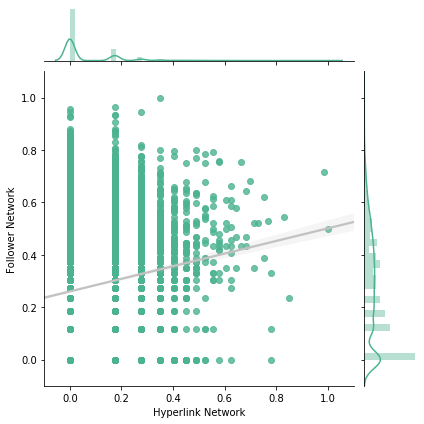

In [10]:
# out_degree log
x = list(norm(np.log(degree.deg_h_out+1)))
y = list(norm(np.log(degree.deg_f_out+1)))
data = pd.DataFrame({
    'Hyperlink Network': x,
    'Follower Network': y,
})
h = sns.jointplot(x='Hyperlink Network', 
                  y='Follower Network',
                  data=data,color="#4CB391",kind="reg",ylim = (-0.1,1.1),xlim = (-0.1,1.1),#color="#4CB391"
                 joint_kws={'line_kws':{'color':'0.7607843137254902'}})
path = 'degree_out_log.png'
#plt.savefig(path, format = "png", dpi = 300)

### Non zeros
Exclude all companies which do not have any connections at all

In [13]:
deg = degree
x1 = []
x2 = []
for ind, row in deg.iterrows():
    deg_h = row.degree_h
    deg_f = row.degree_f
    if deg_h!=0:
        if deg_f !=0:
            if deg_h<=10:
                x1.append(deg_h)
                x2.append(deg_f)

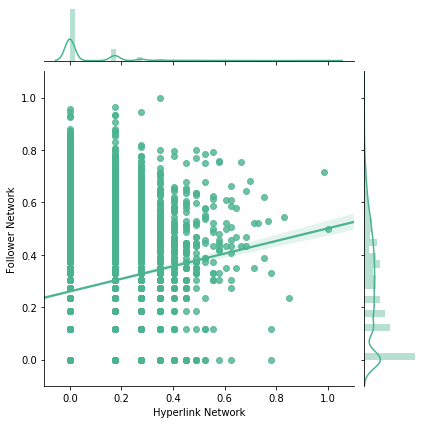

In [12]:
# out_degree_log_non_zeros
# used in the study
x = list(norm(np.log(degree.deg_h_out+1)))
y = list(norm(np.log(degree.deg_f_out+1)))
data = pd.DataFrame({
    'Hyperlink Network': x,
    'Follower Network': y,
})
h = sns.jointplot(x='Hyperlink Network', 
                  y='Follower Network',
                  data=data,color="#4CB391",kind="reg",ylim = (-0.1,1.1),xlim = (-0.1,1.1))
path = 'out_degree_log_non_zeros.png'
#plt.savefig(path, format = "png", dpi = 300)

# Closeness

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality

### Inward

In [57]:
start = time.time()
closs_in_weighted_hyp = nx.closeness_centrality(weighted_directed_hyplinks_graph, distance=None, wf_improved=True)
# wf_improved:  If True, scale by the fraction of nodes reachable. This gives the Wasserman and Faust improved formula. For single component graphs it is the same as the original formula.
# Meaning good for not one component graphs
print(time.time()-start)

start = time.time()
closs_in_weighted_foll = nx.closeness_centrality(weighted_directed_followers_graph, distance=None, wf_improved=True)
# wf_improved:  If True, scale by the fraction of nodes reachable. This gives the Wasserman and Faust improved formula. For single component graphs it is the same as the original formula.
# Meaning good for not one component graphs
print(time.time()-start)

1.0181591510772705
5.91278076171875e-05


### Outward

In [43]:
start = time.time()
closs_out_weighted_hyp = nx.closeness_centrality(weighted_directed_hyplinks_graph.reverse(), distance=None, wf_improved=True)
# wf_improved:  If True, scale by the fraction of nodes reachable. This gives the Wasserman and Faust improved formula. For single component graphs it is the same as the original formula.
# Meaning good for not one component graphs
print(time.time()-start)

start = time.time()
closs_out_weighted_foll = nx.closeness_centrality(weighted_directed_followers_graph.reverse(), distance=None, wf_improved=True)
# wf_improved:  If True, scale by the fraction of nodes reachable. This gives the Wasserman and Faust improved formula. For single component graphs it is the same as the original formula.
# Meaning good for not one component graphs
print(time.time()-start)

0.6504340171813965
656.3440728187561


In [121]:
max(norm(np.log(close.foll_in_close+1)))

1.0

## Saving closeness

In [58]:
hyp_in_close = []
hyp_out_close = []
foll_in_close = []
foll_out_close = []

for key in weighted_directed_followers_graph.nodes():
    hyp_in_close.append(closs_in_weighted_hyp[key])
    hyp_out_close.append(closs_out_weighted_hyp[key])
    foll_in_close.append(closs_in_weighted_foll[key])
    foll_out_close.append(closs_out_weighted_foll[key])
    
    

In [59]:
close = pd.DataFrame(list(zip(list(weighted_directed_followers_graph.nodes()),
                              hyp_in_close, hyp_out_close,
                              foll_in_close, foll_out_close)),
                     columns = ['nodes',
                                'hyp_in_close', 'hyp_out_close', 
                                'foll_in_close', 'foll_out_close'])

close.to_csv('closeness.csv')

## Create plots closeness

In [16]:
close = pd.read_csv('closeness.csv',index_col =0)

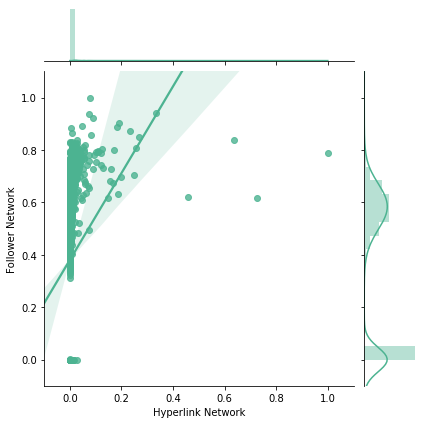

In [17]:
#in_closeness
x = norm(np.log(close.hyp_in_close+1))
y = norm(np.log(close.foll_in_close+1))
data = pd.DataFrame({
    'Hyperlink Network': x,
    'Follower Network': y,
})
h = sns.jointplot(x='Hyperlink Network', 
                  y='Follower Network',
                  data=data,color="#4CB391",kind="reg", ylim = (-0.1,1.1),xlim = (-0.1,1.1))
path = 'in_closeness.png'
#plt.savefig(path, format = "png", dpi = 300)

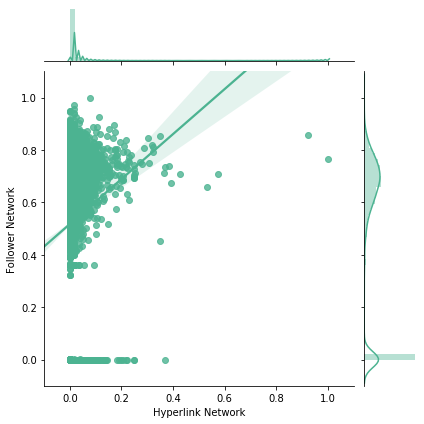

In [18]:
#out_closeness 
# used in the study

x = norm(np.log(close.hyp_out_close+1))
y = norm(np.log(close.foll_out_close+1))
data = pd.DataFrame({
    'Hyperlink Network': x,
    'Follower Network': y,
})
h = sns.jointplot(x='Hyperlink Network', 
                  y='Follower Network',
                  data=data,color="#4CB391",kind="reg", ylim = (-0.1,1.1),xlim = (-0.1,1.1))
path = 'out_closeness.png'
#plt.savefig(path, format = "png", dpi = 300)

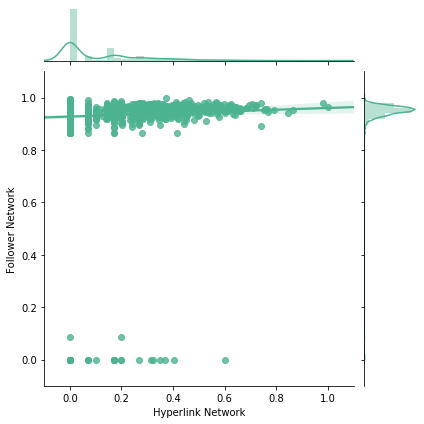

In [126]:
# out_closeness_non_zeros
cl = close
x1 = []
x2 = []
for ind, row in cl.iterrows():
    helper1 = row.hyp_out_close
    helper2 = row.foll_out_close
    if helper1!=0:
        if helper2 !=0:
            x1.append(helper1)
            x2.append(helper2)

x = norm(np.log(x1))
y = norm(np.log(x2))
data = pd.DataFrame({
        'Hyperlink Network': x,
    'Follower Network': y,
})
h = sns.jointplot(x='Hyperlink Network', 
                  y='Follower Network',
              data=data,color="#4CB391",kind="reg", ylim = (-0.1,1.1),xlim = (-0.1,1.1))
path = 'out_closeness_non_zeros.png'
plt.savefig(path, format = "png", dpi = 300)

In [30]:
closs_in_weighted_hyp_norm = {}
counter = 0
maxx = max(closs_in_weighted_hyp.values())
for key in closs_in_weighted_hyp.keys():
    val = closs_in_weighted_hyp[key]
    normed_val = val/maxx
    closs_in_weighted_hyp_norm[key] = normed_val
    #print(counter)
    counter+=1
closs_out_weighted_hyp_norm = {}
counter = 0
maxx = max(closs_out_weighted_hyp.values())
for key in closs_out_weighted_hyp.keys():
    val = closs_out_weighted_hyp[key]
    normed_val = val/maxx
    closs_out_weighted_hyp_norm[key] = normed_val
    #print(counter)
    counter+=1

In [45]:
closs_in = {}
maxx = max(closs_in_weighted_hyp.values())+1
for key in closs_in_weighted_hyp.keys():
    val = closs_in_weighted_hyp[key]+1
    normed_val = (val-1)/(maxx-1)
    closs_in[key] = normed_val

In [66]:
X = list(closs_in_weighted_hyp.values())
print(len(closs_in_weighted_hyp.values()))
clos = [i for i in X if i != 0]

11894


# Betweenness

In [48]:
start = time.time()
betw_weighted_hyp = nx.betweenness_centrality(weighted_directed_hyplinks_graph, weight=None)#, normalized=True
# normalized:  it will be normalized! 
print(time.time()-start)

start = time.time()
betw_weighted_foll = nx.betweenness_centrality(weighted_directed_followers_graph, weight=None)#, normalized=True
# normalized:  it will be normalized! 
print(time.time()-start)


133.9136679172516
812.0225200653076


## Saving betweenness

In [49]:
betw_hyp = []
betw_foll = []

for key in weighted_directed_followers_graph.nodes():
    betw_hyp.append(betw_weighted_hyp[key])
    betw_foll.append(betw_weighted_foll[key])


In [50]:
betw = pd.DataFrame(list(zip(list(weighted_directed_followers_graph.nodes()),
                             betw_hyp,
                             betw_foll)), 
                    columns = ['nodes','betw_hyp','betw_foll'])

betw = pd.read_csv('betwenness.csv',index_col =0)

## Create plots betweenness


In [5]:
betw = pd.read_csv('betweenness.csv')

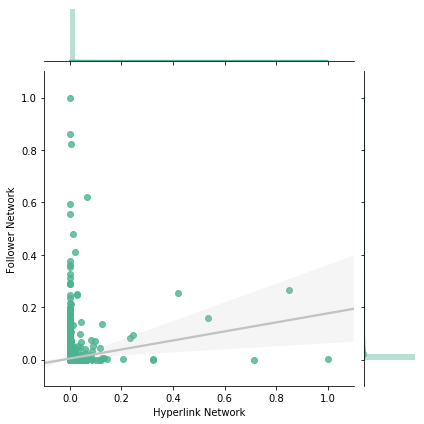

In [9]:
# betweenness_zeros.png
# used in the study

x = norm((betw.betw_hyp))
y = norm((betw.betw_foll))
data = pd.DataFrame({
    'Hyperlink Network': x,
    'Follower Network': y,
})
h = sns.jointplot(x='Hyperlink Network', 
                  y='Follower Network',
                  data=data,color="#4CB391",kind="reg", ylim = (-0.1,1.1),xlim = (-0.1,1.1),
                 joint_kws={'line_kws':{'color':'0.7607843137254902'}})
path = 'betweenness_zeros.png'
#plt.savefig(path, format = "png", dpi = 300)

# Effect Size difference betweenness
Not relevant for other measures 

In [10]:
from researchpy import ttest
betw = pd.read_csv('betweenness.csv')

In [11]:
betw

,Unnamed: 0,betw_hyp,betw_foll
0,@SwiftSystemsInc,4.952722e-08,4.036762e-04
1,@netedfound,0.000000e+00,0.000000e+00
2,@mediatechplus,0.000000e+00,1.199761e-04
3,@systemtools,0.000000e+00,0.000000e+00
4,@TrackerDesigns,0.000000e+00,0.000000e+00
...,...,...,...
11885,@cmdalkon,0.000000e+00,1.378744e-04
11886,@ninestarconnect,0.000000e+00,0.000000e+00
11887,@mpw_tweets,0.000000e+00,0.000000e+00
11888,@dftcomm,0.000000e+00,5.011038e-08


In [17]:
# betweenness 
ttest(betw.betw_hyp,betw.betw_foll, equal_variances=True, paired=True)

(    Variable        N          Mean            SD            SE     95% Conf.  \
 0   betw_hyp  11890.0  4.406452e-09  8.193689e-08  7.514300e-10  2.933527e-09   
 1  betw_foll  11890.0  1.261977e-04  7.129658e-04  6.538495e-06  1.133811e-04   
 2       diff  11890.0 -1.261932e-04  7.129561e-04  6.538405e-06 -1.390096e-04   
 
        Interval  
 0  5.879378e-09  
 1  1.390142e-04  
 2 -1.133769e-04  ,                   Paired samples t-test     results
 0  Difference (betw_hyp - betw_foll) =      -0.0001
 1                 Degrees of freedom =   11889.0000
 2                                  t =     -19.3003
 3              Two side test p value =       0.0000
 4             Difference < 0 p value =       0.0000
 5             Difference > 0 p value =       1.0000
 6                          Cohen's d =      -0.3540
 7                          Hedge's g =      -0.3539
 8                      Glass's delta =   -1540.1274
 9                        Pearson's r =       0.1743)

Cohens d: -0.3540 => difference small

In [82]:
df = pd.DataFrame(list(zip(x,y)), columns = ['x','y'])
from scipy import stats
stats.ks_2samp(x, y)

Ks_2sampResult(statistic=0.2473404255319149, pvalue=1.660965286195619e-10)